<a href="https://colab.research.google.com/github/huma1995/statistics/blob/main/Python_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NumPy** is a foundational package for numerical computing in Python.
In particular it has a multi-dimensional array object (ndarray) allowing fast mathematical operations without the need for loops and ability to exploit low-level langauge libraries. This is used as a fast and flexible container for large datasets. All data in ndarrays are of the same type

In [ ]:
import numpy as np

In [ ]:
#generate an ndarray of random data
data = np.random.randn(2,3)
data

array([[ 0.51404042,  0.30182779, -0.21135778],
       [-0.17605576,  0.4507289 ,  0.58268654]])

In [ ]:
#mathematical operations are written like scalar operations
data * 10

array([[ 5.1404042 ,  3.01827795, -2.11357784],
       [-1.76055757,  4.50728898,  5.82686537]])

In [ ]:
data + data

array([[ 1.02808084,  0.60365559, -0.42271557],
       [-0.35211151,  0.9014578 ,  1.16537307]])

In [ ]:
#ndarrays contain data of the same type and have a shape
data.dtype

dtype('float64')

In [ ]:
data.shape

(2, 3)

In [ ]:
#ndarrays can be indexed and sliced like other python objects
data[0:2,0:2]

array([[ 0.51404042,  0.30182779],
       [-0.17605576,  0.4507289 ]])

In [ ]:
#ndarrays are faster than standard Python data structures
my_array = np.arange(1000000)
my_list = list(range(1000000))

In [ ]:
%%timeit
for _ in range (10):
  my_array2 = my_array * 2

21.7 ms ± 6.2 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
for _ in range(10):
  my_list2 = [x * 2 for x in my_list]

771 ms ± 13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Scipy** sparse matrix. If most of the elements of the matrix have 0 value, then it is called a sparse matrix. Using a 2D array wastes lots of memory as zeroes in the matrix are of no use in most of the cases. So, instead of storing zeroes with non-zero elements, we only store non-zero elements. Scipy implements methods for creating sparse matrices. This uses a list of row and col coordinates and the data held at these positions

In [ ]:
from scipy.sparse import csr_matrix

row_A = np.array([0, 0, 1, 2 ])
col_A = np.array([0, 1, 0, 1])
data_A = np.array([4, 3, 8, 9])

csrMatrix_A = csr_matrix((data_A,
                          (row_A, col_A)),
                        shape = (3, 3))

# print csc matrix
print("csr matrix: \n",
      csrMatrix_A.toarray())

csr matrix: 
 [[4 3 0]
 [8 0 0]
 [0 9 0]]


**Pandas** adopts features from NumPy but is designed to work with tabular data which can be heterogeneous - i.e. tables of mixed data types like a spreadsheet. The two main data structures are series and dataframes

In [ ]:
#Series have a one-dimensional array-like object with values and an associated array (index) of data labels
import pandas as pd
series1 = pd.Series([2, 4, -8, 3], index=['a', 'b', 'c', 'd'])
series1

,0
a,2
b,4
c,-8
d,3


In [ ]:
#NumPy functions can be used and the labels can also be used as indices for manipulation
series1 * 10

,0
a,20
b,40
c,-80
d,30


In [ ]:
series1[['a','c']]

,0
a,2
c,-8


In [ ]:
#dataframes are a table with an ordered collection of columns each of a type.
#It is like a dict of Series (columns) all sharing the same index (row number)
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]
        }
frame1 = pd.DataFrame(data)
frame1

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [ ]:
#DataFrames can be manipulated using column and row indices or labels
frame1.loc[:, 'state']

,state
0,Ohio
1,Ohio
2,Ohio
3,Nevada
4,Nevada
5,Nevada


In [ ]:
#use conditionals to create subsets of dataframes.
low_pop = frame1[frame1['pop'] < 2.5]
low_pop

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
3,Nevada,2001,2.4


In [ ]:
#you can apply functions in the same manner as NumPy, add/remove columns and rows, sort, re-index
#and combine (join) dataframes in a similar way to database tables
frame1.describe()

,year,pop
count,6.000000,6.000000
mean,2001.500000,2.550000
std,1.048809,0.836062
min,2000.000000,1.500000
25%,2001.000000,1.875000
50%,2001.500000,2.650000
75%,2002.000000,3.125000
max,2003.000000,3.600000


from matplotlib import pyplot as plt
_df_0['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['pop'].plot(kind='hist', bins=20, title='pop')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='year', y='pop', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['pop']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('pop')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['pop'].plot(kind='line', figsize=(8, 4), title='pop')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#where data values are invalid or missing a 'NaN' value is displayed
frame1['debt'] = pd.Series([-1.2, -1.5, -1.7, -2.0])
frame1

,state,year,pop,debt
0,Ohio,2000,1.5,-1.2
1,Ohio,2001,1.7,-1.5
2,Ohio,2002,3.6,-1.7
3,Nevada,2001,2.4,-2.0
4,Nevada,2002,2.9,NaN
5,Nevada,2003,3.2,NaN


**Matplotlib** is a library for graphical representation of data. Some of the functions are incorporated into pandas, others are accessed by importing the library

In [ ]:
import matplotlib.pyplot as plt

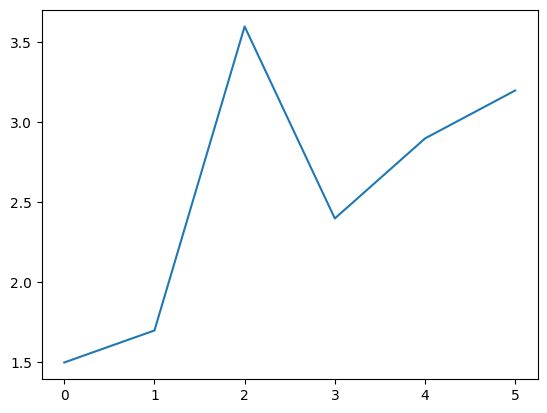

In [ ]:
#use matplotlib methods to plot data from a dataframe
plt.plot(frame1['pop'])

<Axes: >

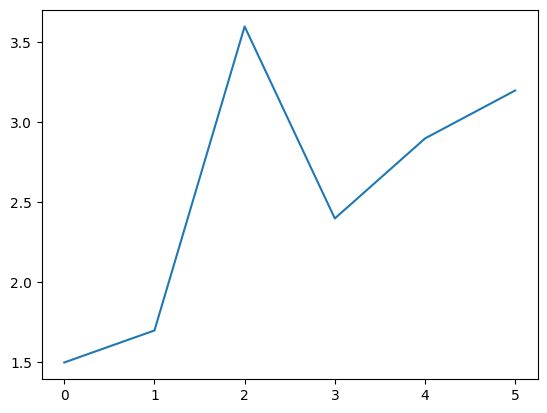

In [ ]:
#simple graphical functions are built into pandas
frame1['pop'].plot()

<Axes: >

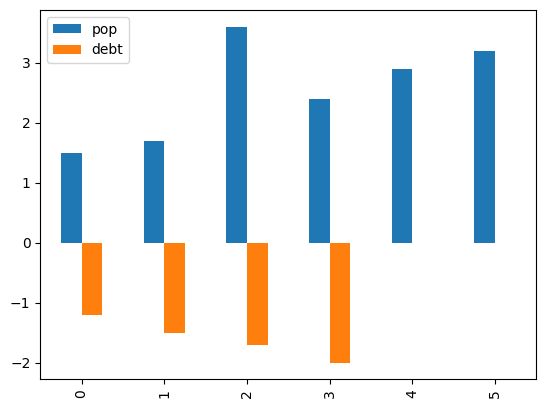

In [ ]:
frame1[['pop','debt']].plot.bar()